In [4]:
import tensorflow as tf

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [6]:
# Importing the dataset
from tensorflow.keras.datasets import cifar10 # built in dataset
# https://www.kaggle.com/c/cifar-10/

In [13]:
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 643s 4us/step


In [14]:
class_names=['0 : airplane', '1 : automobile', '2 : bird', '3 : cat','4 : deer', '5 : dog', '6 : frog', '7 : horse', '8 : ship', '9 : truck']

In [15]:
print(class_names)

['0 : airplane', '1 : automobile', '2 : bird', '3 : cat', '4 : deer', '5 : dog', '6 : frog', '7 : horse', '8 : ship', '9 : truck']


In [16]:
x_train.max(), x_train.min(), x_train.mean() #max is 255 images

(255, 0, 120.70756512369792)

In [17]:
y_train.max(), y_train.min()

(9, 0)

In [18]:
# Normalising the images
x_train=x_train/255.0
x_test=x_test/255.0

In [19]:
x_train.max(), x_train.min(), x_train.mean() #range is from 0-1

(1.0, 0.0, 0.4733630004850874)

In [20]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

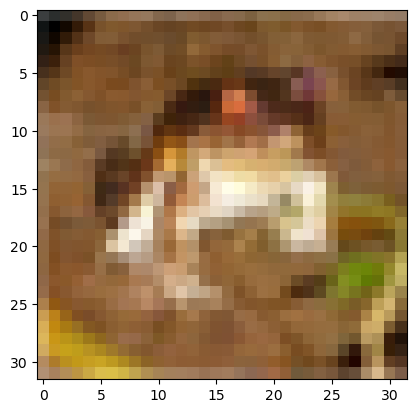

In [21]:
plt.imshow(x_train[0])

In [22]:
y_train[0] # we see the image name in the same index from y_train

array([6], dtype=uint8)

In [23]:
class_names
# and then check it in class names

['0 : airplane',
 '1 : automobile',
 '2 : bird',
 '3 : cat',
 '4 : deer',
 '5 : dog',
 '6 : frog',
 '7 : horse',
 '8 : ship',
 '9 : truck']

as the size is 32x32 (given in site)

# Building the CNN model

In [24]:
# defining the object
model= tf.keras.models.Sequential()

 Adding first CNN layer
 we add 5 parameters here
1) filters (kernel) = 32
2) kernal size = 3  3) padding = same
4) activation = ReLU
5) input shape = 32x32x3 ( RGB channel so 3 )

 Same Padding = image+filter= output (here we add a column of zeros)
 valid padding , we loose information andf we dont add the column of zeros


In [31]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3]))

In [33]:
# adding second CNN Layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

#maxpool layer parameters
# 1) pool size =3
# 2) strides =2
# 3) padding=valid

# pool size : is the size of the sqaure units on which we would be selecting the maximum
# by how many unit pixels the pool size is moving is the strides

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [34]:
# adding 3rd CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')) #filters are 64

In [35]:
# adding fourth CNN Layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

#maxpool layer parameters
# 1) pool size =3
# 2) strides =2
# 3) padding=valid

# pool size : is the size of the sqaure units on which we would be selecting the maximum
# by how many unit pixels the pool size is moving is the strides

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [37]:
# dropout layer (for regularisation)
model.add(tf.keras.layers.Dropout(0.4))

In [38]:
# adding the flatening layer
model.add(tf.keras.layers.Flatten()) # we are converting the array into a vector with the help of flattening layer

In [41]:
# Adding the first dense layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [42]:
# Adding the SECOND dense layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # as the number of outputs would be 10, and softmax for prob

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

# Training the model

In [47]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
# loss function, optimiser will find the global minimum, metrics is for accuracy calculation.
# sparce as we have multiple outputs

In [52]:
# training of model-
model.fit(x_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
5000/5000 [==============================] - 180s 36ms/step - loss: 0.3894 - sparse_categorical_accuracy: 0.8636
Epoch 2/10
5000/5000 [==============================] - 182s 36ms/step - loss: 0.3874 - sparse_categorical_accuracy: 0.8656
Epoch 3/10
5000/5000 [==============================] - 187s 37ms/step - loss: 0.3789 - sparse_categorical_accuracy: 0.8682
Epoch 4/10
5000/5000 [==============================] - 184s 37ms/step - loss: 0.3719 - sparse_categorical_accuracy: 0.8692
Epoch 5/10
5000/5000 [==============================] - 6806s 1s/step - loss: 0.3709 - sparse_categorical_accuracy: 0.8713
Epoch 6/10
5000/5000 [==============================] - 184s 37ms/step - loss: 0.3608 - sparse_categorical_accuracy: 0.8757
Epoch 7/10
5000/5000 [==============================] - 179s 36ms/step - loss: 0.3574 - sparse_categorical_accuracy: 0.8771
Epoch 8/10
5000/5000 [==============================] - 181s 36ms/step - loss: 0.3593 - sparse_categorical_accuracy: 0.8751
Epoch 9/1

# Model Evaluation and prediction

In [53]:
# evaluate the model performance
test_loss, test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 13s 37ms/step - loss: 0.8705 - sparse_categorical_accuracy: 0.7546


In [54]:
print('Test Accuracy : {} '.format(test_acc))

Test Accuracy : 0.7545999884605408 


Above we get the test accuracy of out model, we do the same using a corr matrix and then using a corr accuracy

In [57]:
# Predictions
y_pred=model.predict(x_test)

313/313 [==============================] - 10s 33ms/step


In [58]:
print(y_pred[101],y_test[101]) # compare it witha actual one

[7.7749959e-05 3.1125750e-05 1.5260197e-02 1.9007108e-01 1.2177713e-01
 5.9450257e-01 5.0399933e-02 2.7675811e-02 1.8709081e-05 1.8580801e-04] [5]
